# Data simulation with survivalGPU 

survivalGPU include an implementation of the permutation algorithm. This is an algorithm that generate data follwing  

In [1]:
import torch
import os
import sys
import pykeops
import numpy as np

sys.path.append("dev/survivalGPU/python")
os.getcwd()
import survivalgpu
# from survivalgpu import use_cuda, device, float32, int32, int64
# from survivalgpu.utils import numpy
# from survivalgpu import wce_torch








[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


## Simulation of a dataset with the permalgo 

generate Xmat is a function

- max_time : the duration of the observation period where we have data on the simulated dataset
- n_patients : the number of patients simulated
- doses : a list of the doses of drugs that can be given to a patient
- scenario : the shape of the WCE function representing the impact of the drug on the HR
- HR_target : the HR that the drug should have if one unit of the drug is taken every day during the observation period

In [2]:
from survivalgpu.simulation import get_scenario, generate_Xmat, simulate_dataset


dataset = simulate_dataset(max_time = 365 ,
                           n_patients = 500, 
                           doses = [1,1.5,2,2.5,3], 
                           scenario = "exponential_scenario", 
                           HR_target = 1.5)


In [68]:
from survivalgpu.simulation import simulate_dataset, get_scenario
from survivalgpu.wce import wce_torch
from survivalgpu.utils import device, float32, int32, int64


dataset = simulate_dataset(max_time = 365, 
                           n_patients = 500, 
                           doses = [1,1.5,2,2.5,4], 
                           scenario = "exponential_scenario", 
                           HR_target = 1.5)
print(dataset)

       patient  start  stop  event  dose
0            1      0     1      1   1.5
1            2      0     1      0   1.0
2            2      1     2      0   1.0
3            3      0     1      0   1.5
4            3      1     2      0   1.5
...        ...    ...   ...    ...   ...
76552      500    358   359      0   0.0
76553      500    359   360      0   0.0
76554      500    360   361      0   0.0
76555      500    361   362      0   0.0
76556      500    362   363      1   0.0

[76557 rows x 5 columns]


In [8]:
print(result.keys())

dict_keys(['hessian', 'sctest init', 'loglik init', 'loglik', 'coef', 'u', 'imat', 'means', 'knotsmat', 'std', 'SED', 'WCEmat', 'est', 'vcovmat'])


In [9]:
WCEmat = result["WCEmat"]
WCEmat.shape

torch.Size([1000, 180])

In [10]:
vecnum  = np.ones(cutoff)
vecdenom = np.zeros(cutoff)



In [11]:
def compute_HR(row, vecnum, vecdenom):
    num = np.exp(np.dot(row, vecnum))
    denom = np.exp(np.dot(row, vecdenom))
    return num / denom

hr = np.apply_along_axis(compute_HR, 1, WCEmat, vecnum, vecdenom)

# print(hr)
# print(WCEmat)


hr_matrix = np.exp(np.dot(WCEmat, vecnum)) / np.exp(np.dot(WCEmat, vecdenom))
hr =hr_matrix[0]
print(hr)
print()

# create matrix quantile each colum hr_matrix
quantiles = np.quantile(hr_matrix, [0.025, 0.975])

print(quantiles)






1.855477260089885

[1.21983069 2.82317515]


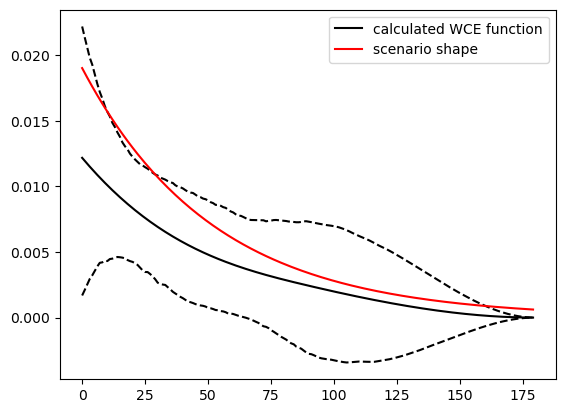

In [14]:
from matplotlib import pyplot as plt

# get quantiles each column WCEmat

quantiles = np.quantile(WCEmat, [0.025, 0.975], axis = 0)
plt.plot(np.arange(0, 180),WCEmat[0], c = "black", label = "calculated WCE function")
plt.plot(np.arange(0, 180),quantiles[0], c = "black", linestyle = "--")
plt.plot(np.arange(0, 180),quantiles[1], c = "black", linestyle = "--")
plt.plot((np.arange(0, 180)),scenario_shape[:180], c = "red", label = "scenario shape")
plt.legend()



# Missings of the package in python

- HR 
- BIC 
- plot


